                                        File name  Temperature (K)  \
6  OneView_200kV_10kX_FGT_A1_0012_019K_2.25um.png               19   
1  OneView_200kV_10kX_FGT_A1_0019_037K_2.25um.png               37   
5  OneView_200kV_10kX_FGT_A1_0029_061K_2.25um.png               61   
7  OneView_200kV_10kX_FGT_A1_0032_080K_2.25um.png               80   
2  OneView_200kV_10kX_FGT_A1_0036_103K_2.25um.png              103   
4  OneView_200kV_10kX_FGT_A1_0038_124K_2.25um.png              124   
3  OneView_200kV_10kX_FGT_A1_0040_130K_2.25um.png              130   
8  OneView_200kV_10kX_FGT_A1_0042_140K_2.25um.png              140   
0  OneView_200kV_10kX_FGT_A1_0046_156K_2.25um.png              156   

   Light pixel to total pixel ratio  \
6                             0.513   
1                             0.506   
5                             0.503   
7                             0.500   
2                             0.496   
4                             0.484   
3                         

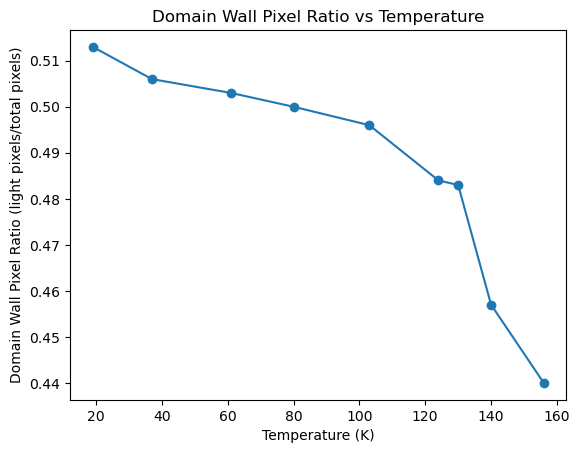

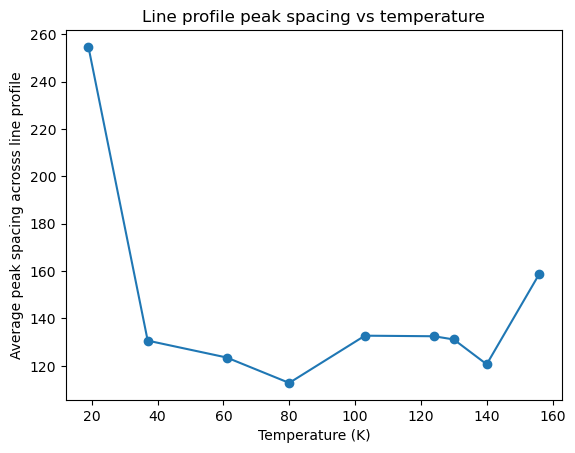

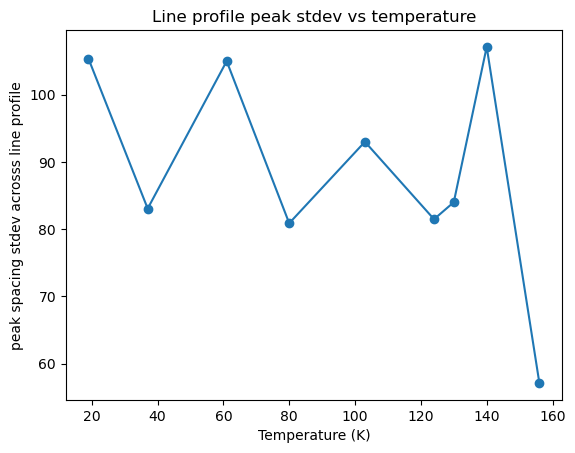

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os

#load/ file
current_path = os.getcwd()
folder_name= '6000OLF_MedRibbon_2mmDefocus_20DegTilt_Rotated15Deg'
DATA_PATH = os.path.join(current_path, 'images', folder_name,'processed') #path to where the data is saved
file_path = os.path.join(DATA_PATH, 'data_summary.csv')

df=pd.read_csv(file_path)
df_sorted = df.sort_values(by='Temperature (K)')
print(df_sorted)

def light_pixel_ratio_graph(dataframe):
    plt.plot(df_sorted['Temperature (K)'],df_sorted['Light pixel to total pixel ratio'],marker = 'o') 
    plt.xlabel("Temperature (K)")
    plt.ylabel("Domain Wall Pixel Ratio (light pixels/total pixels)")
    plt.title("Domain Wall Pixel Ratio vs Temperature")
    plt.show()
    
def line_profile_spacing(dataframe): 
    plt.plot(df_sorted['Temperature (K)'], df_sorted['Avg peak spacing (nm)'],marker = 'o')
    plt.xlabel("Temperature (K)")
    plt.ylabel("Average peak spacing acrosss line profile")
    plt.title("Line profile peak spacing vs temperature")
    plt.show()
    
def line_profile_stdev(dataframe): 
    plt.plot(df_sorted['Temperature (K)'], df_sorted['Standard Deviation of Peak Spacing (nm)'],marker = 'o')
    plt.xlabel("Temperature (K)")
    plt.ylabel("peak spacing stdev acrosss line profile")
    plt.title("Line profile peak stdev vs temperature")
    plt.show()

light_pixel_ratio_graph(df_sorted)
line_profile_spacing(df_sorted)
line_profile_stdev(df_sorted)